<a href="https://colab.research.google.com/github/ahmaduk/Muhammad-Ahmad/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

### About Dataset

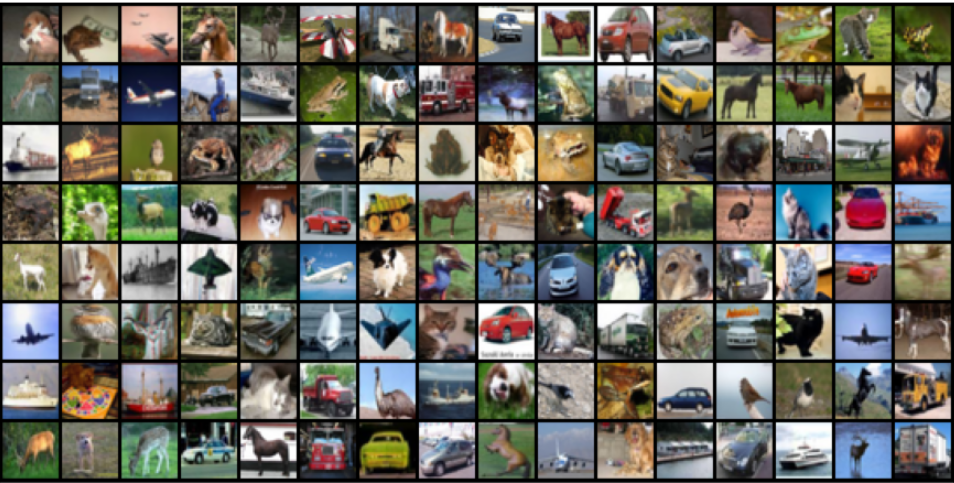

CIFAR-10  is an established computer-vision dataset used for object ecognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton

In [ ]:
# Load data
data=tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test)= data.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
x_train[0] #that is 3d array

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

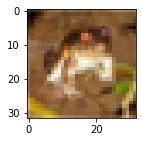

In [ ]:
# Check dataset 
plt.figure(figsize=(10,2))
plt.imshow(x_train[0])

In [ ]:
print(y_train.shape)
print(y_train[:5])

#we need 1d array

y_train=y_train.reshape(-1) #reshape

y_train

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

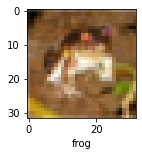

In [ ]:
plot_sample(x_train,y_train,0)

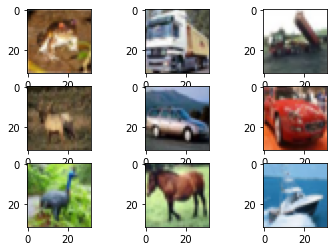

In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

### Normalize data

In [ ]:
print(x_train.max())
print(x_test.max())

255
255


In [ ]:
x_train=x_train/255 #scalling data for better performance
x_test=x_test/255

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Build model

In [ ]:
cnn=models.Sequential([
                       #cnn
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),kernel_initializer='he_uniform', padding='valid'),
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),
                      
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),

                       layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'),
                       layers.MaxPool2D((2,2)),
                       layers.Dropout(0.2),
                       #dense
                       layers.Flatten(),
                       layers.Dense(128,activation='relu',kernel_initializer='he_uniform'),
                       layers.Dropout(0.1),
                       layers.Dense(10,activation='softmax'),
])

In [ ]:
cnn.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,horizontal_flip=True)
train_x_y=datagen.flow(x_train,y_train,batch_size=64)

steps=int(x_train.shape[0]/64)


### Model Summary

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        9248      
                                                        

### Train CNN model

In [ ]:
detail=cnn.fit_generator(train_x_y, epochs=100, validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
782/782 [==============================] - 51s 53ms/step - loss: 2.0758 - accuracy: 0.2224 - val_loss: 1.7693 - val_accuracy: 0.3451
Epoch 2/100
782/782 [==============================] - 40s 51ms/step - loss: 1.7557 - accuracy: 0.3407 - val_loss: 1.5531 - val_accuracy: 0.4337
Epoch 3/100
782/782 [==============================] - 40s 51ms/step - loss: 1.6284 - accuracy: 0.3947 - val_loss: 1.4846 - val_accuracy: 0.4603
Epoch 4/100
782/782 [==============================] - 39s 50ms/step - loss: 1.5430 - accuracy: 0.4300 - val_loss: 1.3838 - val_accuracy: 0.4943
Epoch 5/100
782/782 [==============================] - 39s 50ms/step - loss: 1.4761 - accuracy: 0.4563 - val_loss: 1.3356 - val_accuracy: 0.5103
Epoch 6/100
782/782 [==============================] - 39s 50ms/step - loss: 1.4231 - accuracy: 0.4785 - val_loss: 1.3012 - val_accuracy: 0.5191
Epoch 7/100
782/782 [==============================] - 40s 51ms/step - loss: 1.3802 - accuracy: 0.4963 - val_loss: 1.2602 - val_ac

## Visualize Accuracy and loss

In [ ]:
def summarize_diagnostics(model):


	# plot loss
	plt.subplot(211)
	plt.title('Loss')
	plt.plot(model.history['loss'], color='blue', label='train')
	plt.plot(model.history['val_loss'], color='orange', label='test')
  
	# plot accuracy
	plt.subplot(212)
	plt.title('Accuracy')
	plt.plot(model.history['accuracy'], color='blue', label='train')
	plt.plot(model.history['val_accuracy'], color='orange', label='test')
	
  

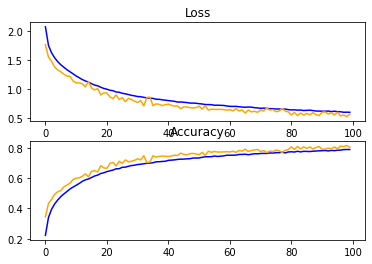

In [ ]:
summarize_diagnostics(detail)

Save Model

In [ ]:
cnn.save('CIFAR-10.h5')

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5706 - accuracy: 0.8054


[0.570621907711029, 0.805400013923645]

**Make prediction And Test from out dataset image**

In [ ]:
test_file_path='/content/frog.jpg'

In [ ]:
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
#fit target image
img=load_img(test_file_path,target_size=(32,32))
img=img_to_array(img)
img_resized=img.reshape(1,32,32,3)
img_resized=img_resized/255
im = np.expand_dims(img_resized, axis=-1)

In [ ]:
result = cnn.predict(im)

In [ ]:
result_index=np.where(result[0]==max(result[0]))
classes[result_index[0][0]]

'frog'

### Load Model and test

In [ ]:
model=load_model('CIFAR-10.h5')

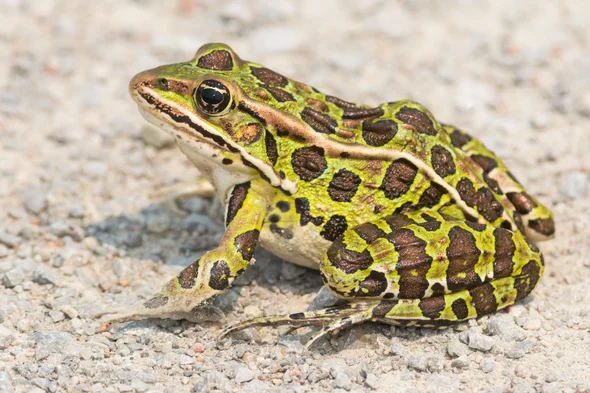

Predicted Picture : frog


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread(test_file_path)
cv2_imshow(image)

print('Predicted Picture :',classes[result_index[0][0]])